In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

/home/user/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.8.0


Rather than using an embedding as in the previous notebook, here we will multi-hot encode the sentences. This model will quickly overfit to the training set. It will be used to demonstrate when overfitting occurs, and how to fight it.

Multi-hot-encoding our lists means turning them into vectors of 0s and 1s. Concretely, this would mean for instance turning the sequence [3, 5] into a 10,000-dimensional vector that would be all- zeros except for indices 3 and 5, which would be ones.



In [2]:
NUM_WORDS = 10000
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=NUM_WORDS)


def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

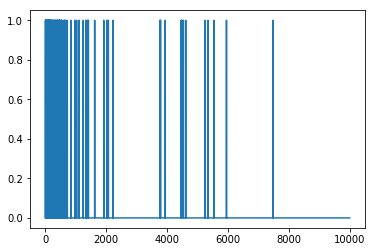

In [3]:
plt.plot(train_data[0])

# Demonstrate overfitting

The simplest way to prevent overfitting is to reduce the size of the model, i.e. the number of learnable parameters in the model (which is determined by the number of layers and the number of units per layer).

Always keep this in mind: deep learning models tend to be good at fitting to the training data, but the real challenge is generalization, not fitting.

In [4]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=30,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/30
 - 2s - loss: 0.4752 - acc: 0.8104 - binary_crossentropy: 0.4752 - val_loss: 0.3320 - val_acc: 0.8766 - val_binary_crossentropy: 0.3320
Epoch 2/30
 - 2s - loss: 0.2450 - acc: 0.9124 - binary_crossentropy: 0.2450 - val_loss: 0.2846 - val_acc: 0.8876 - val_binary_crossentropy: 0.2846
Epoch 3/30
 - 2s - loss: 0.1815 - acc: 0.9372 - binary_crossentropy: 0.1815 - val_loss: 0.2897 - val_acc: 0.8843 - val_binary_crossentropy: 0.2897
Epoch 4/30
 - 2s - loss: 0.1458 - acc: 0.9505 - binary_crossentropy: 0.1458 - val_loss: 0.3161 - val_acc: 0.8781 - val_binary_crossentropy: 0.3161
Epoch 5/30
 - 2s - loss: 0.1211 - acc: 0.9596 - binary_crossentropy: 0.1211 - val_loss: 0.3428 - val_acc: 0.8739 - val_binary_crossentropy: 0.3428
Epoch 6/30
 - 2s - loss: 0.1005 - acc: 0.9686 - binary_crossentropy: 0.1005 - val_loss: 0.3746 - val_acc: 0.8710 - val_binary_crossentropy: 0.3746
Epoch 7/30
 - 2s - loss: 0.0833 - acc: 0.9758 - binary_crossentropy:

In [6]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [7]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=30,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/30
 - 2s - loss: 0.6103 - acc: 0.7016 - binary_crossentropy: 0.6103 - val_loss: 0.5443 - val_acc: 0.7847 - val_binary_crossentropy: 0.5443
Epoch 2/30
 - 2s - loss: 0.4962 - acc: 0.8434 - binary_crossentropy: 0.4962 - val_loss: 0.4929 - val_acc: 0.8422 - val_binary_crossentropy: 0.4929
Epoch 3/30
 - 2s - loss: 0.4465 - acc: 0.8895 - binary_crossentropy: 0.4465 - val_loss: 0.4719 - val_acc: 0.8408 - val_binary_crossentropy: 0.4719
Epoch 4/30
 - 2s - loss: 0.4137 - acc: 0.9106 - binary_crossentropy: 0.4137 - val_loss: 0.4510 - val_acc: 0.8741 - val_binary_crossentropy: 0.4510
Epoch 5/30
 - 2s - loss: 0.3878 - acc: 0.9274 - binary_crossentropy: 0.3878 - val_loss: 0.4416 - val_acc: 0.8698 - val_binary_crossentropy: 0.4416
Epoch 6/30
 - 2s - loss: 0.3657 - acc: 0.9381 - binary_crossentropy: 0.3657 - val_loss: 0.4441 - val_acc: 0.8576 - val_binary_crossentropy: 0.4441
Epoch 7/30
 - 2s - loss: 0.3462 - acc: 0.9474 - binary_crossentropy:

In [8]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [9]:
bigger_model_history = bigger_model.fit(train_data,
                                    train_labels,
                                    epochs=30,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/30
 - 11s - loss: 0.3518 - acc: 0.8458 - binary_crossentropy: 0.3518 - val_loss: 0.2839 - val_acc: 0.8842 - val_binary_crossentropy: 0.2839
Epoch 2/30
 - 9s - loss: 0.1368 - acc: 0.9504 - binary_crossentropy: 0.1368 - val_loss: 0.3345 - val_acc: 0.8716 - val_binary_crossentropy: 0.3345
Epoch 3/30
 - 10s - loss: 0.0405 - acc: 0.9888 - binary_crossentropy: 0.0405 - val_loss: 0.4496 - val_acc: 0.8703 - val_binary_crossentropy: 0.4496
Epoch 4/30
 - 10s - loss: 0.0052 - acc: 0.9992 - binary_crossentropy: 0.0052 - val_loss: 0.6217 - val_acc: 0.8686 - val_binary_crossentropy: 0.6217
Epoch 5/30
 - 10s - loss: 6.3539e-04 - acc: 1.0000 - binary_crossentropy: 6.3539e-04 - val_loss: 0.6949 - val_acc: 0.8712 - val_binary_crossentropy: 0.6949
Epoch 6/30
 - 9s - loss: 1.8999e-04 - acc: 1.0000 - binary_crossentropy: 1.8999e-04 - val_loss: 0.7350 - val_acc: 0.8716 - val_binary_crossentropy: 0.7350
Epoch 7/30
 - 9s - loss: 1.1629e-04 - acc: 1.000

# Plot the training and validation loss
The solid lines show the training loss, and the dashed lines show the validation loss (remember: a lower validation loss indicates a better model). 

Here, the smaller network begins overfitting later than the baseline model (after 6 epochs rather than 4) and its performance degrades much more slowly once it starts overfitting.

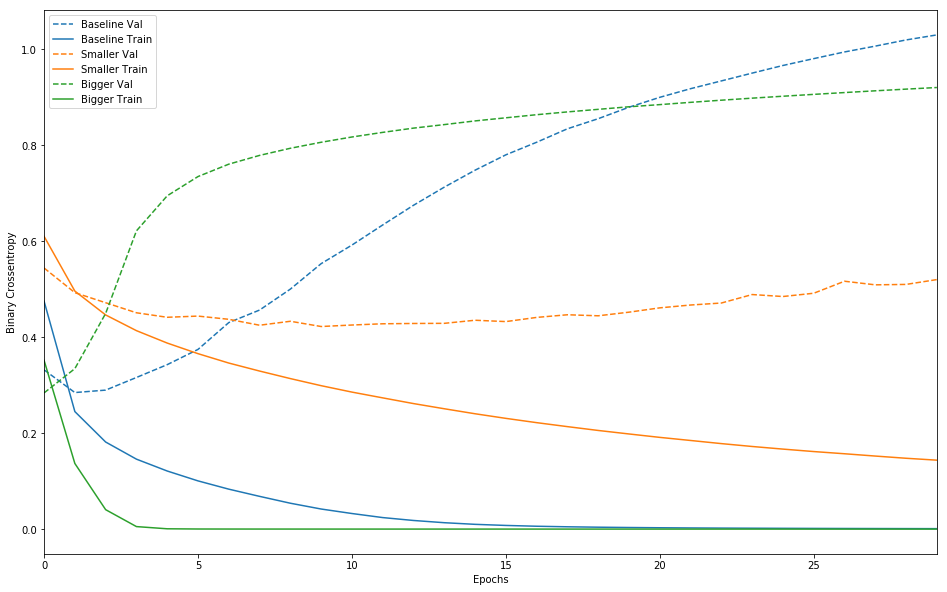

In [12]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

        plt.xlabel('Epochs')
        plt.ylabel(key.replace('_',' ').title())
        plt.legend()

        plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_model_history)])

Notice that the larger network begins overfitting almost right away, after just one epoch, and overfits much more severely. The more capacity the network has, the quicker it will be able to model the training data (resulting in a low training loss), but the more susceptible it is to overfitting (resulting in a large difference between the training and validation loss).

In [13]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 2s - loss: 0.5183 - acc: 0.8152 - binary_crossentropy: 0.4774 - val_loss: 0.3820 - val_acc: 0.8776 - val_binary_crossentropy: 0.3383
Epoch 2/20
 - 2s - loss: 0.3069 - acc: 0.9096 - binary_crossentropy: 0.2587 - val_loss: 0.3433 - val_acc: 0.8841 - val_binary_crossentropy: 0.2922
Epoch 3/20
 - 2s - loss: 0.2597 - acc: 0.9283 - binary_crossentropy: 0.2062 - val_loss: 0.3408 - val_acc: 0.8844 - val_binary_crossentropy: 0.2859
Epoch 4/20
 - 2s - loss: 0.2364 - acc: 0.9366 - binary_crossentropy: 0.1801 - val_loss: 0.3468 - val_acc: 0.8840 - val_binary_crossentropy: 0.2897
Epoch 5/20
 - 2s - loss: 0.2207 - acc: 0.9444 - binary_crossentropy: 0.1624 - val_loss: 0.3582 - val_acc: 0.8806 - val_binary_crossentropy: 0.2994
Epoch 6/20
 - 2s - loss: 0.2117 - acc: 0.9486 - binary_crossentropy: 0.1520 - val_loss: 0.3724 - val_acc: 0.8763 - val_binary_crossentropy: 0.3120
Epoch 7/20
 - 2s - loss: 0.2041 - acc: 0.9518 - binary_crossentropy:

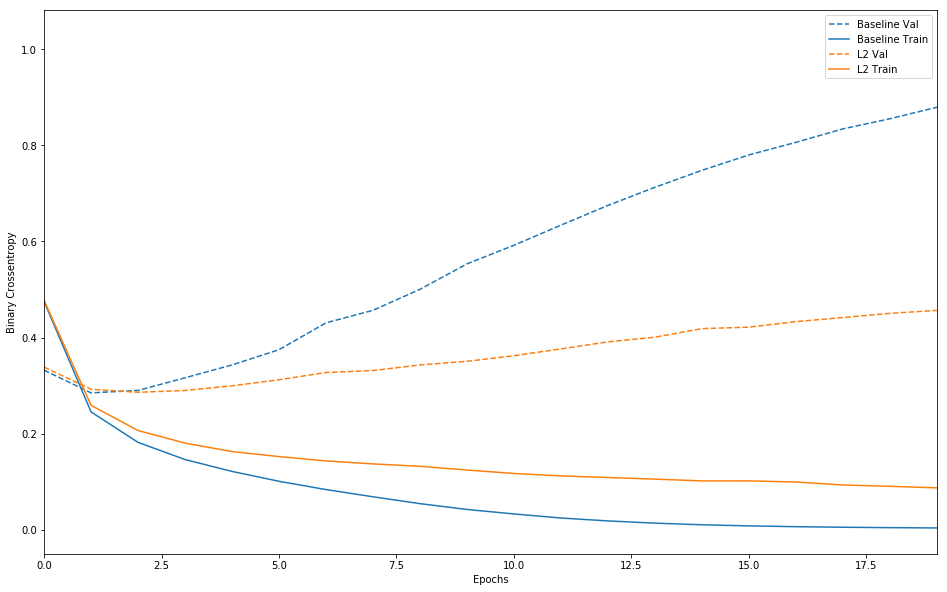

In [14]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [15]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 2s - loss: 0.6124 - acc: 0.6679 - binary_crossentropy: 0.6124 - val_loss: 0.4740 - val_acc: 0.8540 - val_binary_crossentropy: 0.4740
Epoch 2/20
 - 2s - loss: 0.4438 - acc: 0.8147 - binary_crossentropy: 0.4438 - val_loss: 0.3288 - val_acc: 0.8816 - val_binary_crossentropy: 0.3288
Epoch 3/20
 - 2s - loss: 0.3440 - acc: 0.8651 - binary_crossentropy: 0.3440 - val_loss: 0.2836 - val_acc: 0.8881 - val_binary_crossentropy: 0.2836
Epoch 4/20
 - 2s - loss: 0.2846 - acc: 0.8952 - binary_crossentropy: 0.2846 - val_loss: 0.2738 - val_acc: 0.8886 - val_binary_crossentropy: 0.2738
Epoch 5/20
 - 2s - loss: 0.2461 - acc: 0.9128 - binary_crossentropy: 0.2461 - val_loss: 0.2752 - val_acc: 0.8888 - val_binary_crossentropy: 0.2752
Epoch 6/20
 - 2s - loss: 0.2158 - acc: 0.9245 - binary_crossentropy: 0.2158 - val_loss: 0.2843 - val_acc: 0.8878 - val_binary_crossentropy: 0.2843
Epoch 7/20
 - 2s - loss: 0.1915 - acc: 0.9352 - binary_crossentropy:

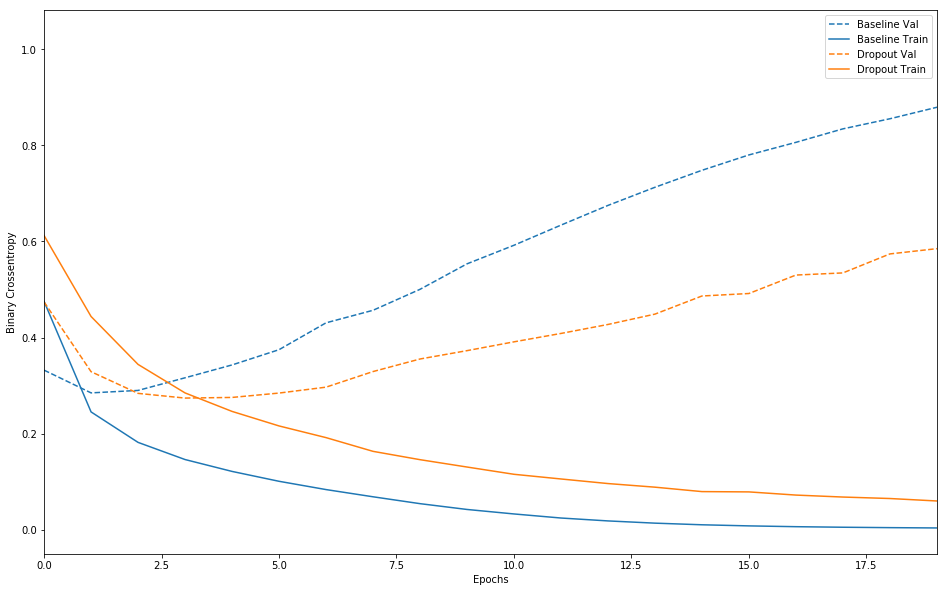

In [16]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

Adding dropout is clear improvement over the baseline model.

To recap: here the most common ways to prevent overfitting in neural networks:

Getting more training data.

Reducing the capacity of the network.

Adding weight regularization.

Adding dropout.

And two important approaches not covered in this guide are data-augmentation and batch normalization.